# NYC Taxi Duration Capstone

## Data Wrangling<a id='Data Wrangling'></a>
* [Objectives](Objectives)
  * [Data Collection](Data_Collection)
  * [Data Definition](Data_Definition)
  * [Data Cleaning](#1.3_Data_Cleaning)
  * [Summary](#1.4_Target_Feature)
      * [2.12 Save data](#2.12_Save_data)
  * [2.13 Summary](#2.13_Summary)

## 1 Objectives<a class="anchor" id="Objectives"></a>

The main objective of this task is to create a dataset that merges taxi and weather data and can be used for EDA. The goal is also to better understand our data and target feature.

### Data Collection<a class="anchor" id="Data_Collection"></a>

The following dataset is based on *2016 NYC Yellow Taxi Cab data*. Data was sampled and cleaned. We will be merging this with the WeatherAPI dataset.

In [75]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
from datetime import timedelta

nyc_taxi = pd.read_csv('../data/train.csv')


pd.set_option('display.max_columns', None)

pd.options.display.float_format = '{:.2f}'.format

In [37]:
nyc_taxi.info()
nyc_taxi.head(10)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1458644 entries, 0 to 1458643
Data columns (total 11 columns):
 #   Column              Non-Null Count    Dtype  
---  ------              --------------    -----  
 0   id                  1458644 non-null  object 
 1   vendor_id           1458644 non-null  int64  
 2   pickup_datetime     1458644 non-null  object 
 3   dropoff_datetime    1458644 non-null  object 
 4   passenger_count     1458644 non-null  int64  
 5   pickup_longitude    1458644 non-null  float64
 6   pickup_latitude     1458644 non-null  float64
 7   dropoff_longitude   1458644 non-null  float64
 8   dropoff_latitude    1458644 non-null  float64
 9   store_and_fwd_flag  1458644 non-null  object 
 10  trip_duration       1458644 non-null  int64  
dtypes: float64(4), int64(3), object(4)
memory usage: 122.4+ MB


,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration
0,id2875421,2,2016-03-14 17:24:55,2016-03-14 17:32:30,1,-73.98,40.77,-73.96,40.77,N,455
1,id2377394,1,2016-06-12 00:43:35,2016-06-12 00:54:38,1,-73.98,40.74,-74.00,40.73,N,663
2,id3858529,2,2016-01-19 11:35:24,2016-01-19 12:10:48,1,-73.98,40.76,-74.01,40.71,N,2124
3,id3504673,2,2016-04-06 19:32:31,2016-04-06 19:39:40,1,-74.01,40.72,-74.01,40.71,N,429
4,id2181028,2,2016-03-26 13:30:55,2016-03-26 13:38:10,1,-73.97,40.79,-73.97,40.78,N,435
5,id0801584,2,2016-01-30 22:01:40,2016-01-30 22:09:03,6,-73.98,40.74,-73.99,40.75,N,443
6,id1813257,1,2016-06-17 22:34:59,2016-06-17 22:40:40,4,-73.97,40.76,-73.96,40.77,N,341
7,id1324603,2,2016-05-21 07:54:58,2016-05-21 08:20:49,1,-73.97,40.80,-73.92,40.76,N,1551
8,id1301050,1,2016-05-27 23:12:23,2016-05-27 23:16:38,1,-74.00,40.74,-73.99,40.73,N,255
9,id0012891,2,2016-03-10 21:45:01,2016-03-10 22:05:26,1,-73.98,40.74,-73.97,40.79,N,1225


#### Dimension of NYC Data

We can also check the dimensions of our data using a shape attribute. 

In [38]:
nyc_taxi.shape

(1458644, 11)

There are currently 11 features and 1,458,644 values. 

#### Merging Relevant Datasets by Time

We want to link this dataset with Weather API. The Weather API dataset is from Kaggle and was recorded during the same period as the NYC Taxi dataset.  We can load the weather data into a separate dataframe and merge based on taxi pickup time. We also know Yellow taxis are limited to Manhattan, so if there is a location feature for all boroughs of New York, we can subset the dataset to only have Manhattan data. 

In [39]:
weather = pd.read_csv('../data/Weather.csv')
weather.head(5)
weather.shape

weather.info()
weather['pickup_datetime'].head(5)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10481 entries, 0 to 10480
Data columns (total 30 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   pickup_datetime  10481 non-null  object 
 1   tempm            10476 non-null  float64
 2   tempi            10476 non-null  float64
 3   dewptm           10476 non-null  float64
 4   dewpti           10476 non-null  float64
 5   hum              10476 non-null  float64
 6   wspdm            9744 non-null   float64
 7   wspdi            9744 non-null   float64
 8   wgustm           1876 non-null   float64
 9   wgusti           1876 non-null   float64
 10  wdird            10481 non-null  int64  
 11  wdire            10481 non-null  object 
 12  vism             10236 non-null  float64
 13  visi             10236 non-null  float64
 14  pressurem        10242 non-null  float64
 15  pressurei        10242 non-null  float64
 16  windchillm       2706 non-null   float64
 17  windchilli  

0    2015-12-31 00:15:00
1    2015-12-31 00:42:00
2    2015-12-31 00:51:00
3    2015-12-31 01:51:00
4    2015-12-31 02:51:00
Name: pickup_datetime, dtype: object

The goal is to merge the Weather's row information by the pickup_datetime in the nyc_taxi dataset. To use **merge_asof**, we will need to use timestamp objects. 

In [40]:
weather['pickup_datetime'] = pd.to_datetime(weather.pickup_datetime,
                                            format="%Y-%m-%d %H:%M:%S")
nyc_taxi['pickup_datetime'] = pd.to_datetime(nyc_taxi.pickup_datetime,
                                            format="%Y-%m-%d %H:%M:%S")
nyc_taxi['dropoff_datetime'] = pd.to_datetime(nyc_taxi.dropoff_datetime,
                                            format="%Y-%m-%d %H:%M:%S")

Our datetime features (pickup, dropoff) are the correct type for data manipulation. We now want to merge the Weather dataset with the NYC_Taxi dataset. There are more taxi entries than weather entries. We want to match the date from weather by the date from nyc_taxi. However, only a very small portion of our NYC dates match the weather dates. 

Therefore, we want to merge datasets by the closest time. We could possibly account for which matches are exact date matches and the time between datetimes for non-exact matches. I can assume that, since the Weather dates are updated hourly, any changes in weather are minor. This might be something to revisit later. 

In [41]:
merged_df = pd.merge_asof(nyc_taxi.sort_values('pickup_datetime'), 
                          weather, 
                          on='pickup_datetime',
                          direction='nearest')


In [42]:
merged_df.info()
merged_df.head(5)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1458644 entries, 0 to 1458643
Data columns (total 40 columns):
 #   Column              Non-Null Count    Dtype         
---  ------              --------------    -----         
 0   id                  1458644 non-null  object        
 1   vendor_id           1458644 non-null  int64         
 2   pickup_datetime     1458644 non-null  datetime64[ns]
 3   dropoff_datetime    1458644 non-null  datetime64[ns]
 4   passenger_count     1458644 non-null  int64         
 5   pickup_longitude    1458644 non-null  float64       
 6   pickup_latitude     1458644 non-null  float64       
 7   dropoff_longitude   1458644 non-null  float64       
 8   dropoff_latitude    1458644 non-null  float64       
 9   store_and_fwd_flag  1458644 non-null  object        
 10  trip_duration       1458644 non-null  int64         
 11  tempm               1458171 non-null  float64       
 12  tempi               1458171 non-null  float64       
 13  dewptm      

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration,tempm,tempi,dewptm,dewpti,hum,wspdm,wspdi,wgustm,wgusti,wdird,wdire,vism,visi,pressurem,pressurei,windchillm,windchilli,heatindexm,heatindexi,precipm,precipi,conds,icon,fog,rain,snow,hail,thunder,tornado
0,id0190469,2,2016-01-01 00:00:17,2016-01-01 00:14:26,5,-73.98,40.72,-73.94,40.83,N,849,5.60,42.10,-3.30,26.10,53.00,7.40,4.60,nan,nan,0,Variable,16.10,10.00,1018.50,30.08,4.00,39.20,nan,nan,nan,nan,Overcast,cloudy,0,0,0,0,0,0
1,id1665586,1,2016-01-01 00:00:53,2016-01-01 00:22:27,1,-73.99,40.75,-73.96,40.72,N,1294,5.60,42.10,-3.30,26.10,53.00,7.40,4.60,nan,nan,0,Variable,16.10,10.00,1018.50,30.08,4.00,39.20,nan,nan,nan,nan,Overcast,cloudy,0,0,0,0,0,0
2,id1210365,2,2016-01-01 00:01:01,2016-01-01 00:07:49,5,-73.97,40.80,-73.95,40.82,N,408,5.60,42.10,-3.30,26.10,53.00,7.40,4.60,nan,nan,0,Variable,16.10,10.00,1018.50,30.08,4.00,39.20,nan,nan,nan,nan,Overcast,cloudy,0,0,0,0,0,0
3,id3888279,1,2016-01-01 00:01:14,2016-01-01 00:05:54,1,-73.98,40.75,-73.99,40.75,N,280,5.60,42.10,-3.30,26.10,53.00,7.40,4.60,nan,nan,0,Variable,16.10,10.00,1018.50,30.08,4.00,39.20,nan,nan,nan,nan,Overcast,cloudy,0,0,0,0,0,0
4,id0924227,1,2016-01-01 00:01:20,2016-01-01 00:13:36,1,-73.97,40.76,-73.99,40.74,N,736,5.60,42.10,-3.30,26.10,53.00,7.40,4.60,nan,nan,0,Variable,16.10,10.00,1018.50,30.08,4.00,39.20,nan,nan,nan,nan,Overcast,cloudy,0,0,0,0,0,0


## Data Definition<a class="anchor" id="Data_Definition"></a>

We now have forty columns. Our initial NYC data was defined as 

- ID: Unique key for ride. There should be no duplicates.

- VendorID: Provider for the trip. There are two companies that service Yellow cabs. **1= Creative Mobile Technologies, LLC; 2= VeriFone Inc**.

- pickup_datetime: Time when the taxi driver engaged their meter.

- dropoff_datetime: Time when taxi driver disengaged teir meter.

- passenger_count: The number of passengers in taxi ride.

- pickup_longitude: The longitude of the pickup.    

- pickup_latitude: The latitude of the pickup.

- dropoff_longitude: The longitude of the dropoff.

- dropoff_latitude: The latitude of the dropoff.

- store_and_fwd_flag: A boolean type; denotes whether the ride was stored in the vehicle and forwarded later, due to the taxi being disconnected from the server. 

-  trip_duration: The length of the taxi ride, in seconds. 

The new columns are from Kaggle NYC weather data. 

- tempm: Temperature in Celcius              
      
-  tempi: Temperature in Fahrenheit             
  
- dewptm: Dewpoint in Celcius           
    
- dewpti: Dewpoint in Fahrenheit            
      
-  hum: Humidity %               
     
-  wspdm: Wind speed in kph             
     
- wspdi: Wind speed in mph             
      
-  wgustm: Wind gust in kph            
   
-  wgusti: Wind gust in mph           
     
-  wdird: Wind direction in degrees             
      
-  wdire: Wind direction description             
       
-  vism: Visiblity in km               
      
-  visi: Visibility in miles              
    
-  pressurem: Pressure in mBar         
      
-  pressurei: Pressure in inHg         
      
-  windchillm: Wind Chill in Celsius     
    
-  windchilli: Wind Chill in Fahrenheit        
     
-  heatindexm: Heat Index Celsius       
     
-  heatindexi: Heat Index Fahrenheit       
      
-  precipm: Precipitation in mm          
  
-  precipi: Precipitation in inches
      
-  conds: Conditions
       
-  icon: The icon used for weather (cloudy, etc.)             
     
-  fog: bool for fog           
      
-  rain: bool for rain  
        
-  snow: bool for snow
     
-  hail: bool for hail            
        
-  thunder: bool for thunder           
       
-  tornado: bool for tornado          


fog, rain, snow, hail, thunder, tornado need to be converted to a Boolean type. We also want to create a column that recognizes weekends and holidays. After EDA, I might also parse the datetime column by average work hours for Manhattan businesses. 

In [43]:
merged_df[['fog','rain','snow','hail','thunder','tornado']] = merged_df[['fog','rain','snow','hail','thunder','tornado']].astype('bool')

merged_df.store_and_fwd_flag[merged_df.store_and_fwd_flag == 'Y'] = 1
merged_df.store_and_fwd_flag[merged_df.store_and_fwd_flag == 'N'] = 0
merged_df[['store_and_fwd_flag']]= merged_df[['store_and_fwd_flag']].astype('bool')

merged_df.rename(columns={'vendor_id':'Vendor',
                         'store_and_fwd_flag':'StoreAndForward',
                         'tempm':'Temperature_C',
                         'tempi':'Temperature_F',
                          'dewptm':'Dewpoint_C',
                          'dewpti':'Dewpoint_F',
                          'hum':'Humidity',
                          'wspdm':'WindSpeed_kph',
                          'wspdi':'WindSpeed_mph',
                          'wgustm':'WindGust_kph',
                          'wgusti':'WindGust_mph',
                          'wdird':'WindDirection_degrees',
                          'wdire':'WindDirection_desc',
                          'vism':'Visibility_km',
                          'visi':'Visibility_miles',
                          'pressurem':'Pressure_mbar',
                          'pressurei':'Pressure_inHg',
                          'windchillm':'WindChill_C',
                          'windchilli':'WindChill_F',
                          'heatindexm':'HeatIndex_C',
                          'heatindexi':'HeatIndex_F',
                          'precipm':'Precipitation_mm',
                          'precipi':'Precipitation_inches',
                          'conds':'Conditions'},
                inplace=True)

<ipython-input-43-0a9ceee108d7>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  merged_df.store_and_fwd_flag[merged_df.store_and_fwd_flag == 'Y'] = 1
<ipython-input-43-0a9ceee108d7>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  merged_df.store_and_fwd_flag[merged_df.store_and_fwd_flag == 'N'] = 0


In [44]:
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1458644 entries, 0 to 1458643
Data columns (total 40 columns):
 #   Column                 Non-Null Count    Dtype         
---  ------                 --------------    -----         
 0   id                     1458644 non-null  object        
 1   Vendor                 1458644 non-null  int64         
 2   pickup_datetime        1458644 non-null  datetime64[ns]
 3   dropoff_datetime       1458644 non-null  datetime64[ns]
 4   passenger_count        1458644 non-null  int64         
 5   pickup_longitude       1458644 non-null  float64       
 6   pickup_latitude        1458644 non-null  float64       
 7   dropoff_longitude      1458644 non-null  float64       
 8   dropoff_latitude       1458644 non-null  float64       
 9   StoreAndForward        1458644 non-null  bool          
 10  trip_duration          1458644 non-null  int64         
 11  Temperature_C          1458171 non-null  float64       
 12  Temperature_F          14581

#### Data Type: Category

We also need to change VendorID, Conditions and icon to categorical data. We will deal with categorical variables later, they are not treated as factors so we will have to use dummy columns or group by the category. 

**Convert taxi_duration to minutes**

We should also convert trip duration to minutes for better legibility. 

In [45]:
merged_df[['Vendor','WindDirection_desc','Conditions','icon']] = merged_df[['Vendor','WindDirection_desc','Conditions','icon']].astype('category')

merged_df['trip_duration'] = merged_df['trip_duration']*(1/60)
               
merged_df.head(5)

,id,Vendor,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,StoreAndForward,trip_duration,Temperature_C,Temperature_F,Dewpoint_C,Dewpoint_F,Humidity,WindSpeed_kph,WindSpeed_mph,WindGust_kph,WindGust_mph,WindDirection_degrees,WindDirection_desc,Visibility_km,Visibility_miles,Pressure_mbar,Pressure_inHg,WindChill_C,WindChill_F,HeatIndex_C,HeatIndex_F,Precipitation_mm,Precipitation_inches,Conditions,icon,fog,rain,snow,hail,thunder,tornado
0,id0190469,2,2016-01-01 00:00:17,2016-01-01 00:14:26,5,-73.98,40.72,-73.94,40.83,False,14.15,5.60,42.10,-3.30,26.10,53.00,7.40,4.60,nan,nan,0,Variable,16.10,10.00,1018.50,30.08,4.00,39.20,nan,nan,nan,nan,Overcast,cloudy,False,False,False,False,False,False
1,id1665586,1,2016-01-01 00:00:53,2016-01-01 00:22:27,1,-73.99,40.75,-73.96,40.72,False,21.57,5.60,42.10,-3.30,26.10,53.00,7.40,4.60,nan,nan,0,Variable,16.10,10.00,1018.50,30.08,4.00,39.20,nan,nan,nan,nan,Overcast,cloudy,False,False,False,False,False,False
2,id1210365,2,2016-01-01 00:01:01,2016-01-01 00:07:49,5,-73.97,40.80,-73.95,40.82,False,6.80,5.60,42.10,-3.30,26.10,53.00,7.40,4.60,nan,nan,0,Variable,16.10,10.00,1018.50,30.08,4.00,39.20,nan,nan,nan,nan,Overcast,cloudy,False,False,False,False,False,False
3,id3888279,1,2016-01-01 00:01:14,2016-01-01 00:05:54,1,-73.98,40.75,-73.99,40.75,False,4.67,5.60,42.10,-3.30,26.10,53.00,7.40,4.60,nan,nan,0,Variable,16.10,10.00,1018.50,30.08,4.00,39.20,nan,nan,nan,nan,Overcast,cloudy,False,False,False,False,False,False
4,id0924227,1,2016-01-01 00:01:20,2016-01-01 00:13:36,1,-73.97,40.76,-73.99,40.74,False,12.27,5.60,42.10,-3.30,26.10,53.00,7.40,4.60,nan,nan,0,Variable,16.10,10.00,1018.50,30.08,4.00,39.20,nan,nan,nan,nan,Overcast,cloudy,False,False,False,False,False,False


## Data Cleaning<a class="anchor" id="Data_Cleaning"></a>

We now need to clean the dataset of missing values. To do this, let's create a dataset that outputs a boolean for missing value. If the output is false, there is no missing value. We can gather the frequency of "True" outputs and find which observations contain missing values.

In [46]:
merged_df_missing = merged_df.isna()
merged_df_missing.head(5)

,id,Vendor,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,StoreAndForward,trip_duration,Temperature_C,Temperature_F,Dewpoint_C,Dewpoint_F,Humidity,WindSpeed_kph,WindSpeed_mph,WindGust_kph,WindGust_mph,WindDirection_degrees,WindDirection_desc,Visibility_km,Visibility_miles,Pressure_mbar,Pressure_inHg,WindChill_C,WindChill_F,HeatIndex_C,HeatIndex_F,Precipitation_mm,Precipitation_inches,Conditions,icon,fog,rain,snow,hail,thunder,tornado
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,True,False,False,False,False,False,False,False,False,True,True,True,True,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,True,False,False,False,False,False,False,False,False,True,True,True,True,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,True,False,False,False,False,False,False,False,False,True,True,True,True,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,True,False,False,False,False,False,False,False,False,True,True,True,True,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,True,False,False,False,False,False,False,False,False,True,True,True,True,False,False,False,False,False,False,False,False


We want to check if all features are boolean. If so, we can find the frequency of missing values per feature.

In [47]:
merged_df_missing.dtypes
df_perc_missing = merged_df_missing.sum()/len(merged_df_missing)

df_perc_missing.sort_values(ascending=False)

HeatIndex_F             0.96
HeatIndex_C             0.96
Precipitation_inches    0.92
Precipitation_mm        0.92
WindGust_mph            0.80
WindGust_kph            0.80
WindChill_C             0.72
WindChill_F             0.72
WindSpeed_kph           0.08
WindSpeed_mph           0.08
Visibility_km           0.03
Visibility_miles        0.03
Pressure_mbar           0.03
Pressure_inHg           0.03
Humidity                0.00
Dewpoint_F              0.00
Dewpoint_C              0.00
Temperature_F           0.00
Temperature_C           0.00
trip_duration           0.00
pickup_latitude         0.00
pickup_longitude        0.00
passenger_count         0.00
dropoff_longitude       0.00
dropoff_latitude        0.00
StoreAndForward         0.00
dropoff_datetime        0.00
pickup_datetime         0.00
Vendor                  0.00
tornado                 0.00
thunder                 0.00
WindDirection_degrees   0.00
WindDirection_desc      0.00
Conditions              0.00
icon          

There are only missing values in the weather dataset. The mix of no missing values and many missing values in the merged weather dataset suggest that our merge was successful. We can drop all columns where the proportion of missing values to recorded is .7. 

We can try to impute missing values for Wind Speed, Visibility, Pressure, Humidity, Dewpoint and Temperature using characteristics of the dataset such as the time of month and the conditions recorded. 

### Summary Statistics

Let's drop the columns that have greater than 70% of its data missing. We will use the .drop method to get rid of the data, axis=1 to signify that the data is organized in columns, and inplace=True to avoid reassigning. 

In [48]:
merged_df.drop(columns = ['WindGust_mph',
                          'WindGust_kph',
                          'HeatIndex_F',
                          'HeatIndex_C',
                          'Precipitation_inches',
                          'Precipitation_mm',
                         'WindChill_C',
                         'WindChill_F'],
              axis = 1,
              inplace = True)
merged_df.head(5)

,id,Vendor,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,StoreAndForward,trip_duration,Temperature_C,Temperature_F,Dewpoint_C,Dewpoint_F,Humidity,WindSpeed_kph,WindSpeed_mph,WindDirection_degrees,WindDirection_desc,Visibility_km,Visibility_miles,Pressure_mbar,Pressure_inHg,Conditions,icon,fog,rain,snow,hail,thunder,tornado
0,id0190469,2,2016-01-01 00:00:17,2016-01-01 00:14:26,5,-73.98,40.72,-73.94,40.83,False,14.15,5.60,42.10,-3.30,26.10,53.00,7.40,4.60,0,Variable,16.10,10.00,1018.50,30.08,Overcast,cloudy,False,False,False,False,False,False
1,id1665586,1,2016-01-01 00:00:53,2016-01-01 00:22:27,1,-73.99,40.75,-73.96,40.72,False,21.57,5.60,42.10,-3.30,26.10,53.00,7.40,4.60,0,Variable,16.10,10.00,1018.50,30.08,Overcast,cloudy,False,False,False,False,False,False
2,id1210365,2,2016-01-01 00:01:01,2016-01-01 00:07:49,5,-73.97,40.80,-73.95,40.82,False,6.80,5.60,42.10,-3.30,26.10,53.00,7.40,4.60,0,Variable,16.10,10.00,1018.50,30.08,Overcast,cloudy,False,False,False,False,False,False
3,id3888279,1,2016-01-01 00:01:14,2016-01-01 00:05:54,1,-73.98,40.75,-73.99,40.75,False,4.67,5.60,42.10,-3.30,26.10,53.00,7.40,4.60,0,Variable,16.10,10.00,1018.50,30.08,Overcast,cloudy,False,False,False,False,False,False
4,id0924227,1,2016-01-01 00:01:20,2016-01-01 00:13:36,1,-73.97,40.76,-73.99,40.74,False,12.27,5.60,42.10,-3.30,26.10,53.00,7.40,4.60,0,Variable,16.10,10.00,1018.50,30.08,Overcast,cloudy,False,False,False,False,False,False


In [49]:
merged_df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
passenger_count,1458644.00,1.66,1.31,0.00,1.00,1.00,2.00,9.00
pickup_longitude,1458644.00,-73.97,0.07,-121.93,-73.99,-73.98,-73.97,-61.34
pickup_latitude,1458644.00,40.75,0.03,34.36,40.74,40.75,40.77,51.88
dropoff_longitude,1458644.00,-73.97,0.07,-121.93,-73.99,-73.98,-73.96,-61.34
dropoff_latitude,1458644.00,40.75,0.04,32.18,40.74,40.75,40.77,43.92
trip_duration,1458644.00,15.99,87.29,0.02,6.62,11.03,17.92,58771.37
Temperature_C,1458171.00,12.61,9.26,-18.30,5.60,12.20,20.60,32.80
Temperature_F,1458171.00,54.69,16.66,-0.90,42.10,54.00,69.10,91.00
Dewpoint_C,1458171.00,2.87,10.52,-28.30,-4.40,3.30,12.20,22.80
Dewpoint_F,1458171.00,37.17,18.94,-18.90,24.10,37.90,54.00,73.00


The maximum trip duration is 58,771.37 minutes. This is improbable, so let's look at the top five durations and figure out how to filter the dataset for duration.  

In [50]:
merged_df.nlargest(20,['trip_duration'])

,id,Vendor,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,StoreAndForward,trip_duration,Temperature_C,Temperature_F,Dewpoint_C,Dewpoint_F,Humidity,WindSpeed_kph,WindSpeed_mph,WindDirection_degrees,WindDirection_desc,Visibility_km,Visibility_miles,Pressure_mbar,Pressure_inHg,Conditions,icon,fog,rain,snow,hail,thunder,tornado
335816,id0053347,1,2016-02-13 22:46:52,2016-03-25 18:18:14,1,-73.78,40.65,-73.98,40.75,False,58771.37,-14.40,6.10,-25.60,-14.10,39.00,16.70,10.40,300,WNW,16.10,10.00,1025.50,30.29,Clear,clear,False,False,False,False,False,False
27211,id1325766,1,2016-01-05 06:14:15,2016-01-31 01:01:07,1,-73.98,40.74,-73.99,40.73,False,37126.87,10.00,50.00,2.20,36.00,59.00,5.60,3.50,0,Variable,16.10,10.00,1022.40,30.19,Overcast,cloudy,False,False,False,False,False,False
335725,id0369307,1,2016-02-13 22:38:00,2016-03-08 15:57:38,2,-73.92,40.74,-73.98,40.76,False,34159.63,-14.40,6.10,-25.60,-14.10,39.00,16.70,10.40,300,WNW,16.10,10.00,1025.50,30.29,Clear,clear,False,False,False,False,False,False
26816,id1864733,1,2016-01-05 00:19:42,2016-01-27 11:08:38,1,-73.79,40.64,-73.96,40.77,False,32328.93,16.70,62.10,6.10,43.00,50.00,0.00,0.00,0,North,16.10,10.00,1003.70,29.64,Mostly Cloudy,mostlycloudy,False,False,False,False,False,False
352116,id1942836,2,2016-02-15 23:18:06,2016-02-16 23:17:58,2,-73.79,40.64,-73.99,40.76,False,1439.87,1.10,34.00,-0.60,30.90,89.00,7.40,4.60,40,NE,2.40,1.50,1019.90,30.12,Light Rain,rain,False,True,False,False,False,False
1220024,id0593332,2,2016-05-31 13:00:39,2016-06-01 13:00:30,1,-73.78,40.64,-73.99,40.75,False,1439.85,27.80,82.00,16.10,61.00,49.00,0.00,0.00,0,North,12.90,8.00,1014.30,29.96,Partly Cloudy,partlycloudy,False,False,False,False,False,False
1017039,id0953667,2,2016-05-06 00:00:10,2016-05-07 00:00:00,1,-74.00,40.75,-73.98,40.74,False,1439.83,11.70,53.10,6.10,43.00,69.00,14.80,9.20,50,NE,16.10,10.00,1005.10,29.68,Overcast,cloudy,False,False,False,False,False,False
1455468,id2837671,2,2016-06-30 16:37:52,2016-07-01 16:37:39,1,-73.99,40.75,-73.96,40.80,False,1439.78,28.90,84.00,12.80,55.00,37.00,nan,nan,0,North,16.10,10.00,1015.00,29.98,Clear,clear,False,False,False,False,False,False
1401700,id1358458,2,2016-06-23 16:01:45,2016-06-24 16:01:30,1,-73.78,40.64,-73.99,40.67,False,1439.75,27.20,81.00,15.00,59.00,47.00,7.40,4.60,60,ENE,12.90,8.00,1009.70,29.82,Mostly Cloudy,mostlycloudy,False,False,False,False,False,False
1116557,id2589925,2,2016-05-17 22:22:56,2016-05-18 22:22:35,4,-74.01,40.73,-73.96,40.82,False,1439.65,13.00,55.40,9.00,48.20,77.00,nan,nan,0,North,nan,nan,nan,nan,Unknown,unknown,False,False,False,False,False,False


The top four span at least twenty days. It is very unlikely that someone spent more than 20 days in a taxi and in transit in New York City. The rest of the top 20 durations seem unlikely either, since each last 1-2 days. Some of these all have the same dropoff time, midnight. This suggests an error from the driver or the server. At the 2100th top observations, the maximum is nearly 200 minutes. This is a sufficient cutoff, given that there are 1.45 million observations in the dataset. 

In [51]:
nyc_taxi_duration = merged_df[merged_df['trip_duration']<=201]
nyc_taxi_duration.nlargest(10, 'trip_duration')

,id,Vendor,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,StoreAndForward,trip_duration,Temperature_C,Temperature_F,Dewpoint_C,Dewpoint_F,Humidity,WindSpeed_kph,WindSpeed_mph,WindDirection_degrees,WindDirection_desc,Visibility_km,Visibility_miles,Pressure_mbar,Pressure_inHg,Conditions,icon,fog,rain,snow,hail,thunder,tornado
229634,id3036391,2,2016-01-31 23:36:45,2016-02-01 02:57:36,1,-73.99,40.74,-73.94,40.80,False,200.85,10.60,51.10,2.20,36.00,56.00,11.10,6.90,250,WSW,16.10,10.00,1008.60,29.79,Clear,clear,False,False,False,False,False,False
1090709,id1534103,2,2016-05-14 20:40:26,2016-05-15 00:00:00,1,-74.01,40.71,-74.00,40.72,False,199.57,16.00,60.80,12.00,53.60,77.00,nan,nan,0,North,nan,nan,nan,nan,Unknown,unknown,False,False,False,False,False,False
380196,id1533825,2,2016-02-19 12:59:11,2016-02-19 16:16:59,1,-73.99,40.75,-74.00,40.71,False,197.80,2.20,36.00,-13.30,8.10,31.00,9.30,5.80,170,South,16.10,10.00,1032.80,30.50,Clear,clear,False,False,False,False,False,False
102748,id1992849,2,2016-01-14 19:29:47,2016-01-14 22:46:31,5,-73.92,40.79,-73.98,40.78,False,196.73,3.30,37.90,-7.20,19.00,47.00,0.00,0.00,0,North,16.10,10.00,1014.60,29.96,Overcast,cloudy,False,False,False,False,False,False
1165427,id1627795,2,2016-05-23 20:45:35,2016-05-24 00:00:00,6,-73.95,40.78,-73.98,40.77,False,194.42,17.80,64.00,6.10,43.00,46.00,7.40,4.60,0,Variable,16.10,10.00,1012.00,29.89,Scattered Clouds,partlycloudy,False,False,False,False,False,False
174693,id0182874,2,2016-01-24 20:28:33,2016-01-24 23:41:44,5,-73.98,40.76,-73.95,40.78,False,193.18,0.00,32.00,-11.10,12.00,44.00,9.30,5.80,310,NW,16.10,10.00,1018.40,30.08,Mostly Cloudy,mostlycloudy,False,False,False,False,False,False
965329,id0850671,2,2016-04-29 20:47:24,2016-04-30 00:00:00,1,-73.97,40.80,-73.95,40.78,False,192.60,8.90,48.00,2.20,36.00,63.00,11.10,6.90,80,East,16.10,10.00,1020.10,30.13,Overcast,cloudy,False,False,False,False,False,False
1241838,id1352166,1,2016-06-03 07:20:58,2016-06-03 10:32:51,5,-73.99,40.75,-73.99,40.75,False,191.88,0.60,33.10,-13.90,7.00,34.00,11.10,6.90,40,NE,16.10,10.00,1024.70,30.26,Overcast,cloudy,False,False,False,False,False,False
1088059,id3886328,1,2016-05-14 15:09:32,2016-05-14 18:20:49,1,-73.79,40.65,-73.99,40.75,False,191.28,20.00,68.00,12.00,53.60,60.00,nan,nan,0,North,nan,nan,nan,nan,Unknown,unknown,False,False,False,False,False,False
204464,id0942692,2,2016-01-29 01:08:33,2016-01-29 04:18:44,1,-74.00,40.74,-73.91,40.69,False,190.18,3.90,39.00,-6.10,21.00,49.00,7.40,4.60,0,Variable,16.10,10.00,1003.10,29.62,Overcast,cloudy,False,False,False,False,False,False


According to the NYC TLC Frequently Asked questions, the highest number of Yellow Taxi Cab drivers is 5 or 6, including the driver. The maximum is 9. Let's look at the max observations and see if this is an anomaly. 

In [52]:
nyc_taxi_duration.nlargest(10, 'passenger_count')
nyc_taxi_duration = nyc_taxi_duration[nyc_taxi_duration['passenger_count']<=6]

#### Impute the remaining Missing Values

Let's look at where our missing values are in the dataframe. 

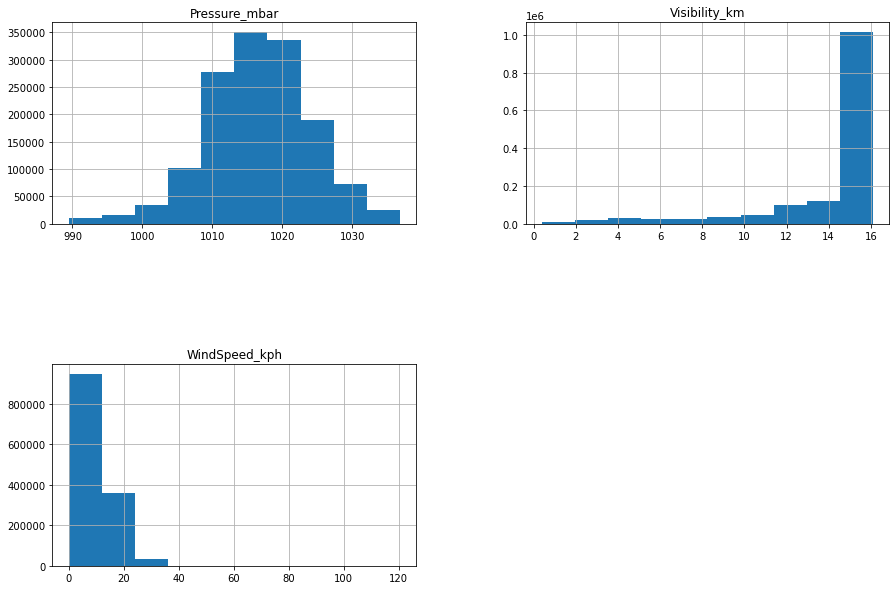

In [53]:
missing_data = nyc_taxi_duration[['WindSpeed_kph','Visibility_km','Pressure_mbar']]
missing_data.hist(figsize=(15,10))
plt.subplots_adjust(hspace=0.7)

For data that seems approximately normal, we will impute using the mean value of the feature. For skewed distributions, we will impute using the median value of the feature. We will then look at the histograms again to make sure that the distribution of the data has not changed drastically

In [54]:
nyc_taxi_duration['Pressure_mbar'].fillna(nyc_taxi_duration['Pressure_mbar'].mean(), inplace=True)
nyc_taxi_duration['Pressure_inHg'].fillna(nyc_taxi_duration['Pressure_inHg'].mean(), inplace=True)

nyc_taxi_duration['Visibility_km'].fillna(nyc_taxi_duration['Visibility_km'].median(), inplace=True)
nyc_taxi_duration['Visibility_miles'].fillna(nyc_taxi_duration['Visibility_miles'].median(), inplace=True)
nyc_taxi_duration['WindSpeed_kph'].fillna(nyc_taxi_duration['WindSpeed_kph'].median(), inplace=True)
nyc_taxi_duration['WindSpeed_mph'].fillna(nyc_taxi_duration['WindSpeed_mph'].median(), inplace=True)


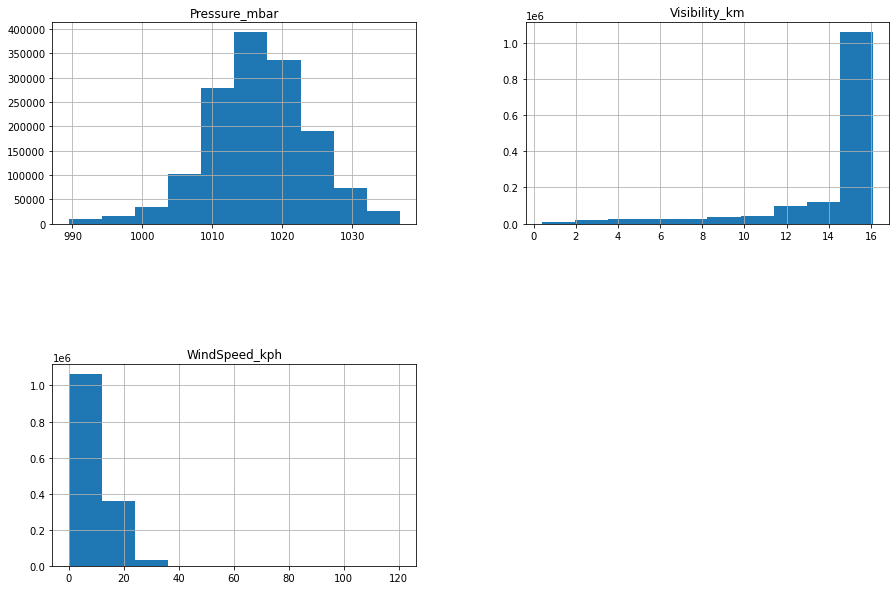

In [56]:
missing_data = nyc_taxi_duration[['WindSpeed_kph','Visibility_km','Pressure_mbar']]
missing_data.hist(figsize=(15,10))
plt.subplots_adjust(hspace=0.7)

**No major changes to the distribution of the data happened as a result of our imputation.** 

Let's take a look at how many missing values remain in our dataset. Before we check the remainder of missing values, we can observe that 

- Temperature_C and Temperature_F should have the same number of missing values.

- Dewpoint_C and Dewpoint_F should have the same number of missing values.

- Dewpoint and Humidity are related features (Dewpoint is temperature where relative humidity reaches 100%).

In [57]:
print(nyc_taxi_duration.isnull().sum())

id                         0
Vendor                     0
pickup_datetime            0
dropoff_datetime           0
passenger_count            0
pickup_longitude           0
pickup_latitude            0
dropoff_longitude          0
dropoff_latitude           0
StoreAndForward            0
trip_duration              0
Temperature_C            472
Temperature_F            472
Dewpoint_C               472
Dewpoint_F               472
Humidity                 472
WindSpeed_kph              0
WindSpeed_mph              0
WindDirection_degrees      0
WindDirection_desc         0
Visibility_km              0
Visibility_miles           0
Pressure_mbar              0
Pressure_inHg              0
Conditions                 0
icon                       0
fog                        0
rain                       0
snow                       0
hail                       0
thunder                    0
tornado                    0
dtype: int64


For temperature missing values, we can find the averages by month using the **pickup_datetime** feature and impute the mean temperature from the corresponding month. The same can be done for dewpoint. 

### Create datetime columns

We need to figure out the months when the missing data recorded. We can then impute the missing data based on the averages of the month, assuming that the distribution is not skewed. 

In [58]:
temp_dewpt_hum = nyc_taxi_duration[nyc_taxi_duration.isnull().any(axis=1)]

temp_dewpt_hum.sort_values(by='pickup_datetime')

## From April to May. Need to parse columns by Month, Year, Day of the Week. 
temp_dewpt_hum['Month'] = temp_dewpt_hum['pickup_datetime'].dt.month

temp_dewpt_hum['Month'].unique()
# Months are only April and May. Use averages from April and May imputing temp, dewpt, hum

<ipython-input-58-077f8be6fc0a>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  temp_dewpt_hum['Month'] = temp_dewpt_hum['pickup_datetime'].dt.month


array([4, 5], dtype=int64)

In [59]:
nyc_taxi_duration['Month'] = nyc_taxi_duration['pickup_datetime'].dt.month
nyc_month= nyc_taxi_duration.set_index('Month').groupby('Month').mean()

nyc_taxi_duration.loc[(nyc_taxi_duration['Month'] == 4)].Temperature_C.mean()

13.735462836003965

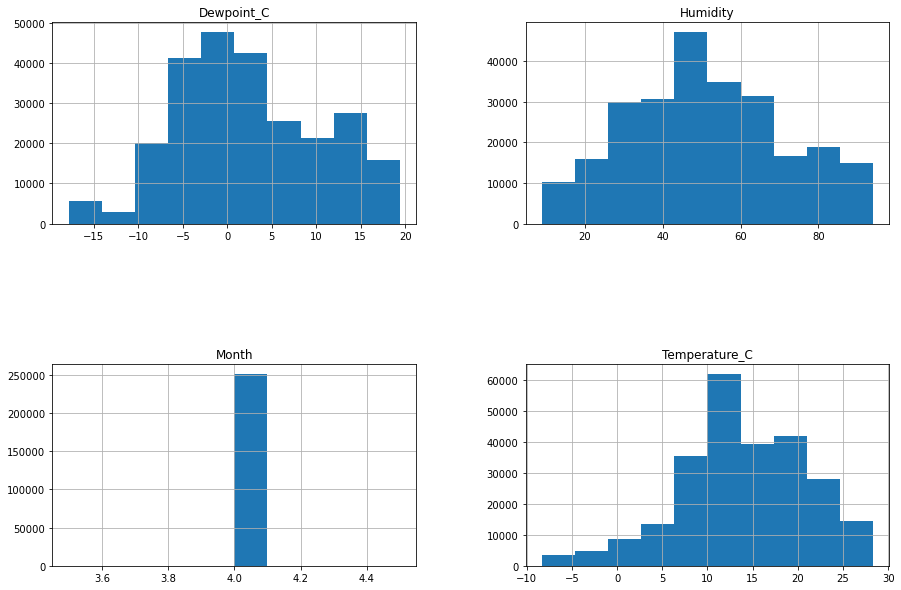

In [60]:
## Find percentage of missing values per month
nyc_taxi_duration.groupby('Month').agg('count')

relevant_month = nyc_taxi_duration[['Month','Temperature_C','Dewpoint_C','Humidity']]
relevant_month_april = relevant_month[relevant_month['Month'] == 4]
relevant_month_april.hist(figsize=(15,10))
plt.subplots_adjust(hspace=0.7)


We will use mean imputation. 

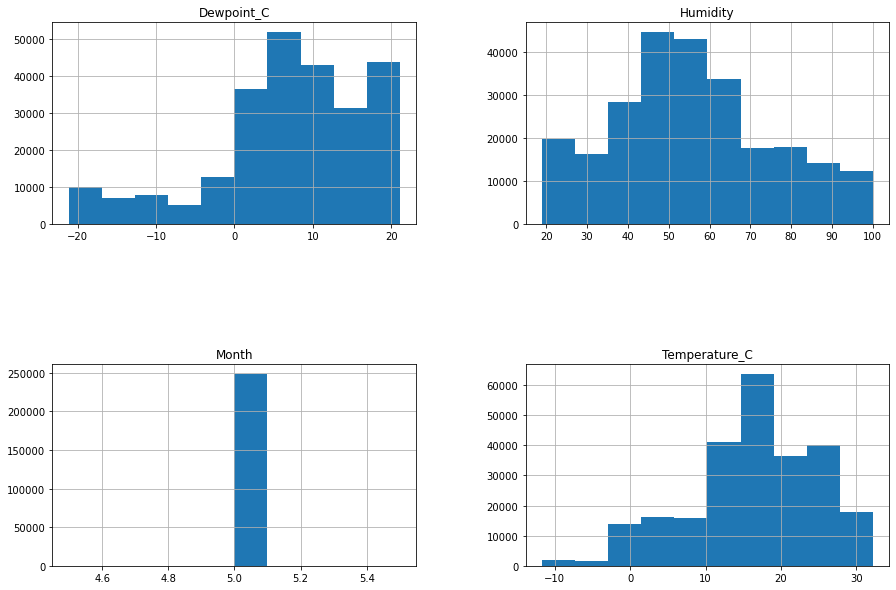

In [61]:
relevant_month_may = relevant_month[relevant_month['Month'] == 5]
relevant_month_may.hist(figsize=(15,10))
plt.subplots_adjust(hspace=0.7)

In [62]:
# Impute April Data
nyc_taxi_duration.loc[(nyc_taxi_duration['Temperature_C'].isnull()) & 
          (nyc_taxi_duration['Month'] == 4), 'Temperature_C'] = nyc_taxi_duration.loc[(nyc_taxi_duration['Month'] == 4)].Temperature_C.mean()

nyc_taxi_duration.loc[(nyc_taxi_duration['Temperature_F'].isnull()) & 
          (nyc_taxi_duration['Month'] == 4), 'Temperature_F'] = nyc_taxi_duration.loc[(nyc_taxi_duration['Month'] == 4)].Temperature_F.mean()

nyc_taxi_duration.loc[(nyc_taxi_duration['Dewpoint_C'].isnull()) & 
          (nyc_taxi_duration['Month'] == 4), 'Dewpoint_C'] = nyc_taxi_duration.loc[(nyc_taxi_duration['Month'] == 4)].Dewpoint_C.mean()

nyc_taxi_duration.loc[(nyc_taxi_duration['Dewpoint_F'].isnull()) & 
          (nyc_taxi_duration['Month'] == 4), 'Dewpoint_F'] = nyc_taxi_duration.loc[(nyc_taxi_duration['Month'] == 4)].Dewpoint_F.mean()

nyc_taxi_duration.loc[(nyc_taxi_duration['Humidity'].isnull()) & 
          (nyc_taxi_duration['Month'] == 4), 'Humidity'] = nyc_taxi_duration.loc[(nyc_taxi_duration['Month'] == 4)].Humidity.mean()

# Impute May Data
nyc_taxi_duration.loc[(nyc_taxi_duration['Temperature_C'].isnull()) & 
          (nyc_taxi_duration['Month'] == 5), 'Temperature_C'] = nyc_taxi_duration.loc[(nyc_taxi_duration['Month'] == 5)].Temperature_C.mean()

nyc_taxi_duration.loc[(nyc_taxi_duration['Temperature_F'].isnull()) & 
          (nyc_taxi_duration['Month'] == 5), 'Temperature_F'] = nyc_taxi_duration.loc[(nyc_taxi_duration['Month'] == 5)].Temperature_F.mean()

nyc_taxi_duration.loc[(nyc_taxi_duration['Dewpoint_C'].isnull()) & 
          (nyc_taxi_duration['Month'] == 5), 'Dewpoint_C'] = nyc_taxi_duration.loc[(nyc_taxi_duration['Month'] == 5)].Dewpoint_C.mean()

nyc_taxi_duration.loc[(nyc_taxi_duration['Dewpoint_F'].isnull()) & 
          (nyc_taxi_duration['Month'] == 5), 'Dewpoint_F'] = nyc_taxi_duration.loc[(nyc_taxi_duration['Month'] == 5)].Dewpoint_F.mean()

nyc_taxi_duration.loc[(nyc_taxi_duration['Humidity'].isnull()) & 
          (nyc_taxi_duration['Month'] == 5), 'Humidity'] = nyc_taxi_duration.loc[(nyc_taxi_duration['Month'] == 5)].Humidity.mean()

Let's check to see how many missing values we have now:

In [63]:
nyc_taxi_duration.isnull().sum()

id                       0
Vendor                   0
pickup_datetime          0
dropoff_datetime         0
passenger_count          0
pickup_longitude         0
pickup_latitude          0
dropoff_longitude        0
dropoff_latitude         0
StoreAndForward          0
trip_duration            0
Temperature_C            0
Temperature_F            0
Dewpoint_C               0
Dewpoint_F               0
Humidity                 0
WindSpeed_kph            0
WindSpeed_mph            0
WindDirection_degrees    0
WindDirection_desc       0
Visibility_km            0
Visibility_miles         0
Pressure_mbar            0
Pressure_inHg            0
Conditions               0
icon                     0
fog                      0
rain                     0
snow                     0
hail                     0
thunder                  0
tornado                  0
Month                    0
dtype: int64

#### Find the number of unique values per feature. 

In [64]:
nyc_taxi_duration.shape

(1456544, 33)

As of now, there are 1,456,549 observations and 33 features. We don't need all of these observations, so we will sample them for training. Let's look at the number of unique values per feature.

In [65]:
nyc_taxi_duration.nunique()

id                       1456544
Vendor                         2
pickup_datetime          1378338
dropoff_datetime         1378566
passenger_count                7
pickup_longitude           23029
pickup_latitude            45227
dropoff_longitude          33799
dropoff_latitude           62493
StoreAndForward                2
trip_duration               6071
Temperature_C                132
Temperature_F                132
Dewpoint_C                   133
Dewpoint_F                   133
Humidity                      91
WindSpeed_kph                 21
WindSpeed_mph                 21
WindDirection_degrees         37
WindDirection_desc            17
Visibility_km                 17
Visibility_miles              17
Pressure_mbar                418
Pressure_inHg                140
Conditions                    14
icon                           9
fog                            2
rain                           2
snow                           2
hail                           1
thunder   

We know that the data is from the first six months of 2016 (January - June). Since the first several observations returned False for hail, thunder and tornado and there is only one unique value for those features, there was no hail, thunder or tornado during the recorded time period. We can drop these columns. 

In [66]:
nyc_taxi_duration.drop(columns = ['hail',
                          'thunder',
                          'tornado'],
              axis = 1,
              inplace = True)

In [67]:
nyc_taxi_duration.shape

(1456544, 30)

#### Find Duplicates in the Dataframe

To find duplicates, we will look for duplicated values by **id**. 

In [68]:
#Use pandas' Series method `value_counts` to find any duplicated resort names
merged_df['id'].value_counts().head()

id0609595    1
id3983332    1
id1706675    1
id1711043    1
id1272056    1
Name: id, dtype: int64

This confirms that there are no duplicate observations in the dataset. 

### Summary

* There were no duplicates. Missing values, for columns where the majority of the data was present, were handled through mean and median imputation. If the distribution was approximately normal or uniform, the mean was used. If the distribution was skewed, the median was used. This ensured that there was no drastic change in the distribution of any feature's values. 

* Temperature, Dewpoint and Humidity were handled in context with 

* Columns where more than 70% of the data was missing was dropped. These include 

* Several more columns will be created to better understand its relationship with our target feature, trip_duration. These columns will find day of the week, whether the trip was recorded on a weekend or weekday, whether the data was recorded during average working hours for Manhattan and dummy columns for boolean types. 

In [78]:
# save the data to a new csv file
# %store nyc_taxi_duration
# datapath = '../data'
# save_file(nyc_taxi_duration, 'nyc_taxi_duration.csv', datapath)\
nyc_taxi_duration.to_csv('../data/nyc_taxi_clean.csv')

In [79]:
conditions_data = nyc_taxi_duration.set_index('Conditions').groupby('Conditions').mean()
pd.DataFrame(conditions_data)
%store conditions_data
conditions_data.to_csv('../data/conditions.csv')

Stored 'conditions_data' (DataFrame)


### Citations: 

**1.** Finding missing values/percentage of NAs. (https://medium.com/dunder-data/finding-the-percentage-of-missing-values-in-a-pandas-dataframe-a04fa00f84ab)

**2.** Impute the remaining missing values. (https://towardsdatascience.com/pandas-tricks-for-imputing-missing-data-63da3d14c0d6)

**3.** Imputation methods. (https://www.kaggle.com/residentmario/simple-techniques-for-missing-data-imputation)

**4.** Dealing with categorical data in Python (https://benalexkeen.com/mapping-categorical-data-in-pandas/)

**5.** Number of people that can fit into taxi cab (https://www1.nyc.gov/site/tlc/passengers/passenger-frequently-asked-questions.page#:~:text=The%20maximum%20amount%20of%20passengers,of%20an%20adult%20passenger%20seated)